<a href="https://colab.research.google.com/github/CumhurBasturk/HelloGitHub/blob/master/01_Descriptive_Statistics_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inferential Statistics

#### HS Olmez © 2019

# Descriptive Statistics

In [ ]:
%load_ext watermark

In [ ]:
%watermark -a "HS Olmez © 2019" -p numpy,scipy,matplotlib,seaborn,sklearn

HS Olmez © 2019 

numpy 1.15.4
scipy 1.1.0
matplotlib 3.0.1
seaborn 0.7.1
sklearn 0.19.2


## Load the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Load the dataset

What we have here is a data set for the IQ levels of students at Starbucks University which is assumed to follow a Normal distribution $IQ$ ~ $N(\mu, \sigma^{2})$ where $\mu=110$ (mean IQ) and $\sigma=5$ (standard deviation). The output is stored in file `IQSU.txt`. Use this data file to read the data into a Pandas dataframe for subsequent operations for data analysis.

In [ ]:
# read from the data file
df = pd.read_csv('data/IQSU.txt', header=None)
df.head()

,0
0,112.206137
1,108.345649
2,122.153856
3,108.739539
4,110.548049


In [ ]:
print('Shape of df:',df.shape)
print('Type of df :',type(df))

Shape of df: (1000, 1)
Type of df : <class 'pandas.core.frame.DataFrame'>


In [ ]:
IQ = df.iloc[:, 0] # All rows from the first (0) column of dataframe
print('Type of IQ:', type(IQ))

Type of IQ: <class 'pandas.core.series.Series'>


In [ ]:
IQ.describe()

count    1000.000000
mean      110.166385
std         4.951921
min        93.580423
25%       106.881725
50%       110.118628
75%       113.507488
max       128.061593
Name: 0, dtype: float64

We shall create a histogram with bins containing the number of data points within the interval defined by that specific bin.
For example, the count below gives the number of measurements within the range of $100 < IQ \leq 120$ 

In [ ]:
# How many data points do we have between 100 and 120 (including 120)
print(sum(1 for i in IQ if ((i > 100) & (i <= 120))), 'out of', len(IQ))

949 out of 1000


## Histogram (frequency distribution)

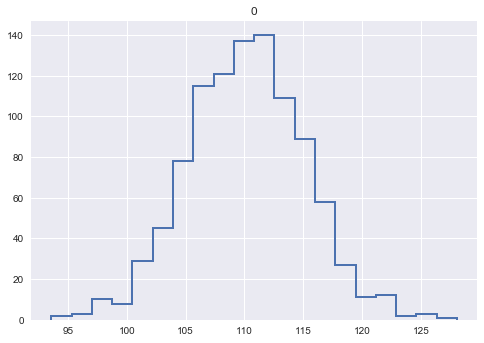

In [ ]:
# plotting a histogram directly from pandas
df.hist(bins=20, histtype='step', lw=2); 

#### How deos bin size affect the histogram?
The `bins` parameter tells you the number of bins that your data will be divided into. You can specify it as an integer or as a list of bin edges.

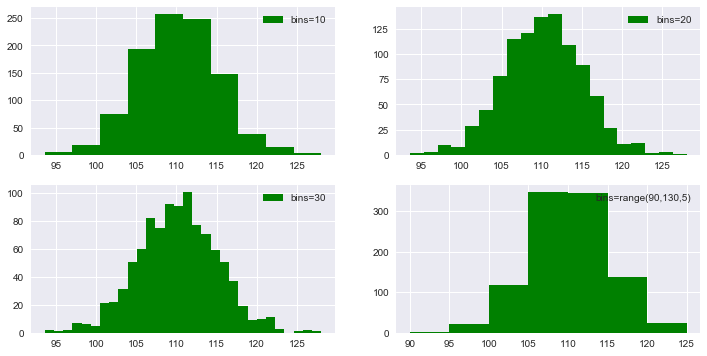

In [ ]:
plt.figure(figsize=(12,6))
# subplot(number_of_rows, number_of_columns, active_subplot)
plt.subplot(2,2,1) 
plt.hist(IQ, bins=10, color='g', label='bins=10')
plt.legend(loc='upper right')

plt.subplot(2,2,2)
plt.hist(IQ, bins=20, color='g', label='bins=20')
plt.legend(loc='upper right')

plt.subplot(2,2,3)
plt.hist(IQ, bins=30, color='g', label='bins=30')
plt.legend(loc='upper right')

plt.subplot(2,2,4)
plt.hist(IQ, bins=range(90,130,5), color='g', label='bins=range(90,130,5)')
plt.legend(loc='upper right')

#plt.tight_layout()
plt.show()

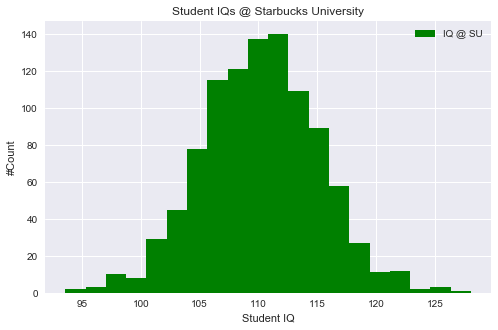

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(IQ, bins=20, color='g', label='IQ @ SU')
plt.title('Student IQs @ Starbucks University')
plt.xlabel('Student IQ') ; plt.ylabel('#Count') ; plt.legend(loc='upper right')
plt.show()

## Histogram (relative frequency)

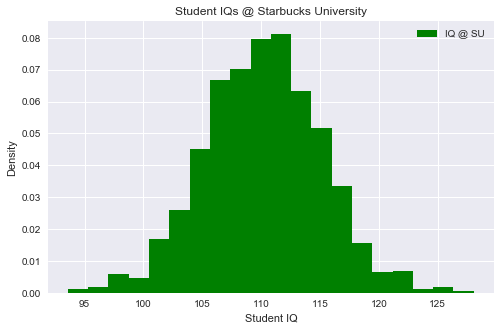

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(IQ, bins=20, density=True, color='g', label='IQ @ SU') # remove density=True, it becomes freq dist
plt.title('Student IQs @ Starbucks University')
plt.xlabel('Student IQ') ; plt.ylabel('Density') ; plt.legend(loc='upper right')
plt.show()

## Cumulative relative frequency

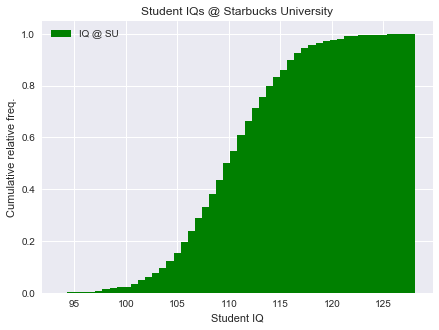

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(IQ, bins=50, density=True, cumulative=1, color='g', label='IQ @ SU')
plt.title('Student IQs @ Starbucks University')
plt.xlabel('Student IQ') ; plt.ylabel('Cumulative relative freq.')
plt.legend(loc='upper left')
plt.show()

## Skewness

In [ ]:
print('Skewness:', IQ.skew())

Skewness: 0.0029397970778169413


In [ ]:
# Using SciPy
import scipy.stats
print('Skewness:', scipy.stats.skew(IQ))

Skewness: 0.0029353855435398464


<b>Result:</b> -0.5 < skewness < 0.5 => Based on these results, we can say that our data has a symmetric distribution

## Measure of central tendency and spread (dispersion)

`Mean`: The average of the data set<br>
$$\bar{x} = \frac{1}{n}$$
`Median`: Measure of the center of the data set (50th percentile)<br>
`Mode`: Point with the highest frequency

`Variance`: Measure of how far a set of numbers are spread out from their average  
$$s^2 = \frac{\sum_{i=1}^n (x_i - \overline{x}_n)^2}{n-1}  $$
`Standard deviation`: Square root of variance (takes the units of measure of the data that it represents) 

In [ ]:
import random
# create a random list of 10 numbers in range(0,100)
x = random.sample(range(0, 100), 10) 
print('Mean    :', sum(x)/len(x), '(using formula)')
print('Mean    :', np.mean(x), '(using numpy)')
print('Median  :', np.median(x), '(using numpy)')
print('Std dev :', np.sqrt(sum((x-np.mean(x))**2)/(len(x)-1)), '(using formula)')
print('Std dev :', np.std(x, ddof=1), '(using numpy)')

Mean    : 58.7 (using formula)
Mean    : 58.7 (using numpy)
Median  : 71.5 (using numpy)
Std dev : 28.913856731870123 (using formula)
Std dev : 28.913856731870123 (using numpy)


## Boxplots

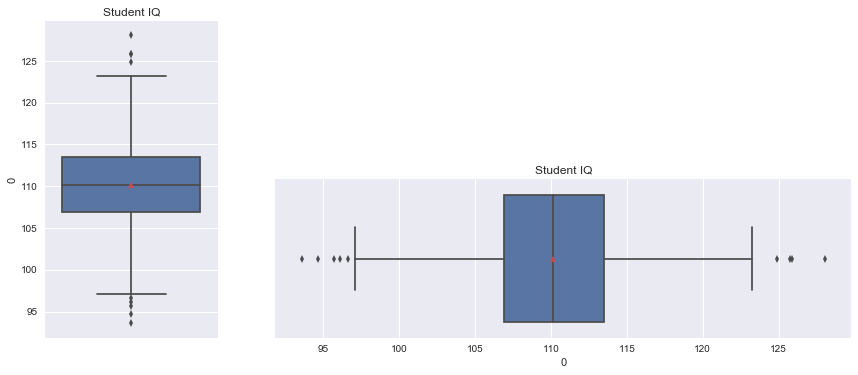

In [ ]:
plt.axes([0.1,0.01,0.3,0.8]) 
ax = sns.boxplot(IQ, showmeans=True, orient='v')
ax.set_title('Student IQ')

plt.axes([0.5,0.01,1.0,0.4])
ax = sns.boxplot(IQ, showmeans=True, orient='h')
ax.set_title('Student IQ')
plt.show()

#### How does a boxplot look like for a skewed distribution?

In [ ]:
yy = np.random.randn(10,1)
yy.shape

(10, 1)

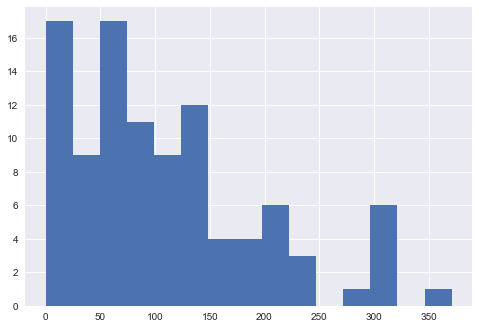

In [ ]:
np.random.seed(42)  # To ensure we get the same data every time.
# random.rnadn(100,1) - An array with 100 points shape:(100,1)
X = (np.random.randn(100,1) * 5 + 10)**2
plt.hist(X, bins=15);

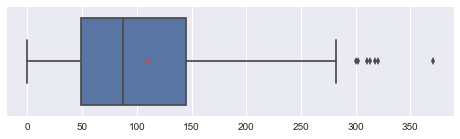

In [ ]:
# change the fig size and make it horizontal
plt.figure(figsize=(8, 2))
sns.boxplot(X, showmeans=True, orient='h');

The mean and median are clearly separated for a highly skewed data

### Multiple boxplots

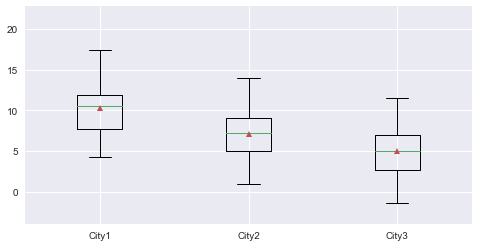

In [ ]:
City1 = np.random.normal(10,3,120)
City2 = np.random.normal(7,3,120)
City3 = np.random.normal(5,3,120)
location = [City1, City2, City3]
plt.figure(figsize=(8, 4))
plt.boxplot(location, showmeans=True)
plt.xticks([1, 2, 3], ['City1', 'City2', 'City3'])
plt.show()

## Q-Q plots (test for normality)

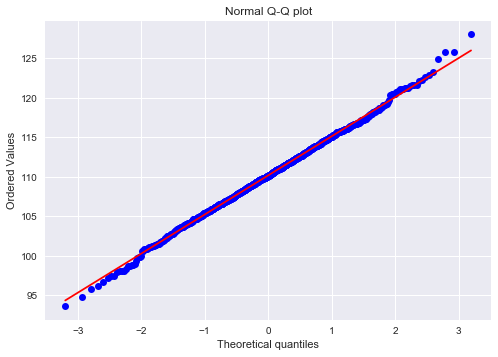

In [ ]:
stats.probplot(IQ, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

This is the Q-Q plot for our IQ data which looks normally distributed.

We'll draw a random sample from a **NORMAL** distribution and examine the QQ plot:

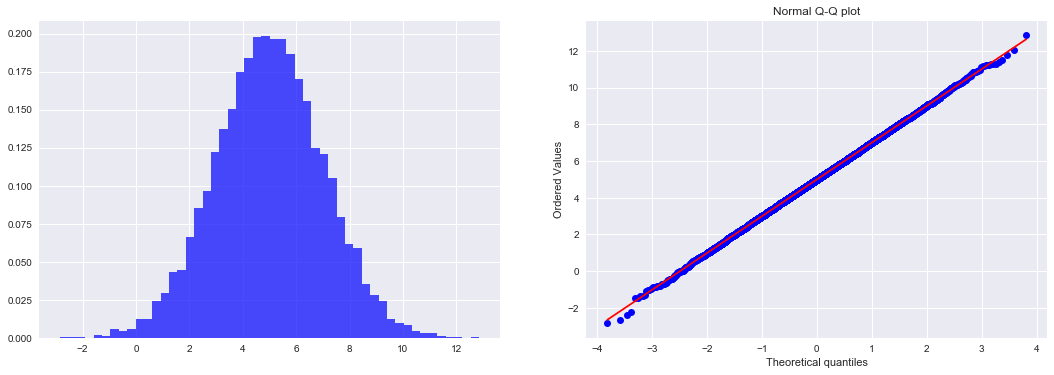

In [ ]:
plt.axes([0.1,0.01,0.8,0.8])
y = np.random.normal(5.0, 2.0, size=10000)
plt.hist(y, bins=50, density=True, facecolor="blue", alpha=0.7)

plt.axes([1.05,0.01,0.8,0.8])
stats.probplot(y, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

We'll now draw a random sample from a **GAMMA** distribution (highly skewed) and examine the QQ plot:

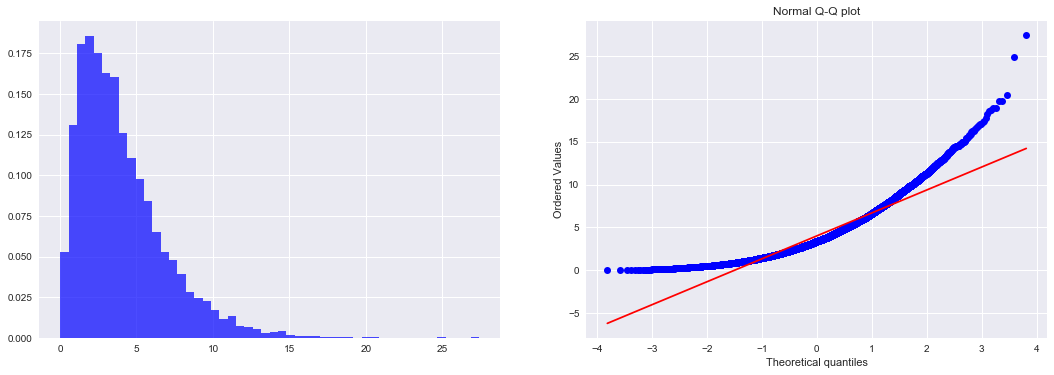

In [ ]:
plt.axes([0.1,0.01,0.8,0.8])
rate = 0.5
y2 = np.random.gamma(shape=2, scale=1/rate, size=10000)
plt.hist(y2, bins=50, density=True, facecolor="blue", alpha=0.7)

plt.axes([1.05,0.01,0.8,0.8])
stats.probplot(y2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Example

## Effect of bin size
In a restaurant, one waiter recorded information about each tip he received over a period of a few months working in one restaurant. He collected the following variables and created a small and simple dataset:

|Variable|Explanation|
|---|---|
|obs|Observation number|
|totbill|The cost of the bill in US dollars|
|tip|Tip in US dollars|
|sex|Gender of the bill payer|
|smoker|Whether the party included smokers|
|day|Day of the week|
|time|Time of day|
|size|Size of the party|

There are 244 records in the dataset. The data was reported in a collection of case studies for business statistics (Bryant & Smith 1995). The primary goal is: What are the factors that affect tipping behavior?

Out of 7 variables (obs not included), 3 variables are numerical and 4 variables are categorical.

The most important variable here is: **tip**<br>
So let's take a look at the histogram for the tip and see what it can tell us:

Ref: http://ggobi.org

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./data/tips.csv', sep=",")
df.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obs,244.0,122.500000,70.580923,1.00,61.7500,122.500,183.2500,244.00
totbill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


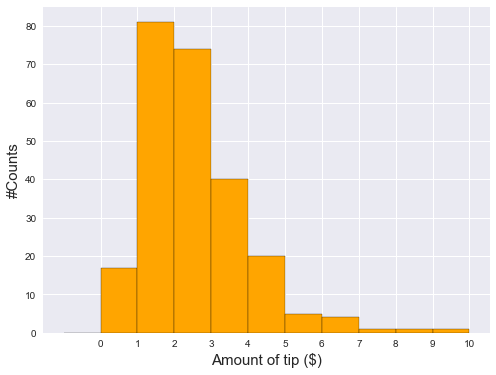

In [ ]:
#Let's create a histogram for the "tip"
tip = df.tip
plt.figure(figsize=(8,6))
plt.hist(tip, bins=np.arange(0,12,1)-0.5, align='left', facecolor="orange", edgecolor='k')
plt.xticks(range(11))
plt.ylabel('#Counts',fontsize=15)
plt.xlabel('Amount of tip ($)',fontsize=15)
plt.show()

We choose an initial bin width of 1 (dollar) and produce the above histogram. The **distribution appears to be unimodal and skewed**; that is, it has one peak, the bar representing the tips greater than \$1.00 and less than or equal  \$2.00. There are
very few tips of \$1.00 or less. The number of larger tips trails off rapidly, which suggests that this is not a very expensive restaurant. 

What if change the bin size (say \$ 0.1 = 10 cents) and plot the histogram again?

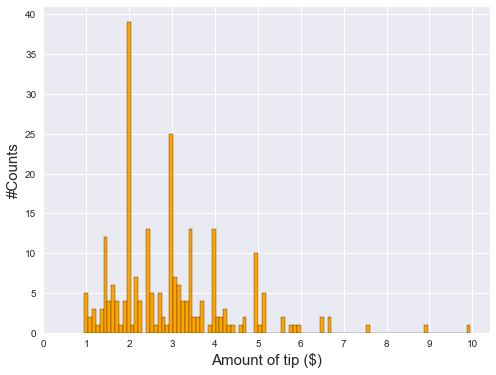

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(tip, bins=100, align='left', facecolor="orange", edgecolor='k')
plt.xticks(range(11))
plt.ylabel('#Counts',fontsize=15)
plt.xlabel('Amount of tip ($)',fontsize=15)
plt.show()

At the smaller bin width (10 cents), the **shape is multimodal**, and it is clear that there are **large peaks at the full
dollars** and **smaller peaks at the half dollar**. This shows that the **customers tended to round the tip to the nearest fifty cents or dollar**. So a smaller bin width can bring out some of the more local features which may not be apparent in the wider bins which are more suitable for global trends.

# Probability Distributions

The main methods used by Python for continuous random variables are:
* <b>rvs</b>: random samples (variates)
* <b>pdf</b>: probability density function
* <b>pmf</b>: probability mass function (for discrete events)
* <b>cdf</b>: cumulative distribution function
* <b>ppf</b>: percentile point function (Inverse of CDF)

<b>CDF</b>: CDF gives the probability that the variate has a value less than or equal to the given value.<br>

<b>PDF</b>: PDF is proportional to the probability of the variate being in a small interval about the given value. The probability of the variate being in a finite interval is the integral of the PDF over the interval. The value of the PDF at any value of the variate can be obtained using the function pdf of the concerned distribution.<br>

<b>PMF</b>: For discrete variates, the probability mass function (PMF) gives the probability of the variate having a value x.

#### Parameters Describing the Form of a Distribution
In scipy.stats, continuous distribution functions are characterized by their <b>location</b> and their <b>scale</b>. Should the definition of a distribution require more than two parameters, the following parameters are called shape parameters. The exact meaning of each parameter can be found in the function definition.

For example, for the normal distribution, (location/shape) are given by (mean/standard deviation) of the distribution. In contrast, for the uniform distribution, location/shape are given by the (start/end) of the range where the distribution is different from zero.

<b>Location</b><br>
A location parameter $x_0$ determines the “location” or shift of a distribution. <br>
$f_{x_0}(x)=f(x−x_0)$ <br>
Examples of location parameters include the mean, the median, and the mode.

<b>Scale</b><br>
The scale parameter describes the width of a probability distribution. If $s$ is large, then the distribution will be more spread out; if $s$ is small then it will be more concentrated. A typical example of scale is the variance If the probability density exists for all values of $s$, then the density (as a function of the scale parameter only) satisfies <br>
$f_s(x)=f(x/s)/s$,<br>
where f is the density of a standardized version of the density.

## Normal (Gaussian) distribution
The Gaussian distribution (or the Normal distribution) is by far the most important distribution function among all. This is probably because the distribution of the sample means approximate a normal distribution for large numbers of samples drawn.

Parameters: $\mu$ (mean) and $\sigma^2$ (variance) <br>
PDF: $$f(X)=\frac{1}{\sigma \sqrt{2\pi}} e^{-(X-\mu)^2/2\sigma^2}$$ <br>
Type: Continuous<br>
Distribution range: -$\infty$ < x < +$\infty$

X is a random variable that has a normal distribution. When we subtracted a constant (like the mean $\mu$) from X, we simply shift the location of the random variable and the distribution is still normal. Dividing a normal random variable by $\sigma_x$ will change the dispersion but not the form of distribution. So transforming x into a new variable Z defined as $Z=\frac{X-\mu}{\sigma_x}$ (Z-score) will keep the normality of the distribution for Z. In fact, when we compute the mean and the variance for this new variable Z, we get the following:<br>

Mean: $E(Z)=0$ and Variance: ${\sigma_z}^2=1$ <br> 

Thus Z is a normal random variable with mean 0 and variance 1. So Z is said to have a <b>standard normal distribution</b> with $Z$ ~ $N(0,1)$. We have changed the the problem involving $X$ ~ $N(\mu_x, {\sigma_x}^2)$ into an equivalent one involving Z.

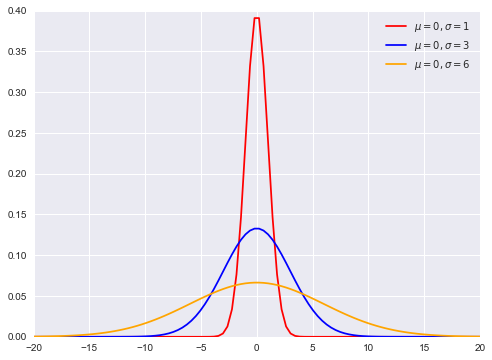

In [ ]:
# Normal distribution
import scipy.stats as stats 
from matplotlib import pyplot as plt

x = np.linspace (-20, 20, 100) 
y1 = stats.norm.pdf(x, loc=0, scale=1)
y2 = stats.norm.pdf(x, loc=0, scale=3)
y3 = stats.norm.pdf(x, loc=0, scale=6)

plt.figure(figsize=(8, 6))
plt.plot(x, y1, "red", label=(r'$\mu=0, \sigma=1$')) 
plt.plot(x, y2, "blue", label=(r'$\mu=0, \sigma=3$'))
plt.plot(x, y3, "orange", label=(r'$\mu=0, \sigma=6$'))
plt.ylim([0,0.4])
plt.xlim([-20,20])
plt.legend()
plt.show()

### How does Python deal with different problems on probability distributions?

Let's plot the pdf for a Normal and Standard Normal distribution:<br>
Let's assume that the $\mu=15$ (mean) and $\sigma=2$ (standard deviation). The PDF for the normal distribution:

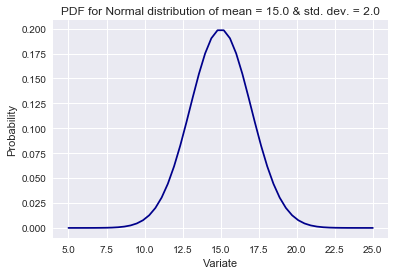

Value at x=mean:  0.19947114020071635


In [ ]:
mean = 15.0
std = 2.0
ndist = stats.norm(loc=mean, scale=std)
x = np.linspace(5, 25, 50)
y = ndist.pdf(x) # OR: y = stats.norm.pdf(x, loc=mean, scale=std)
plt.plot(x,y, color="darkblue")
plt.xlabel("Variate")
plt.ylabel("Probability")
plt.title("PDF for Normal distribution of mean = {0} & std. dev. = {1}".format(mean, std))
plt.show()

print( 'Value at x=mean: ', ndist.pdf(15) )

#### The following statements yield the same output:
<pre>
dist = stats.norm(15,2)
dist.pdf(15)
</pre>
or:
<pre>
stats.norm.pdf(15, loc=15, scale=2
</pre>

### Standard normal distribution:

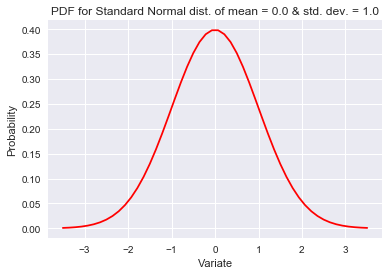

Mean is: 0.0 (as expected from the way we formed the Std Normal dist.)
Value at point zero (mean):  0.3989422804014327


In [ ]:
mean = 0.0
std = 1.0
ndist = stats.norm(loc=mean, scale=std)
x = np.linspace(-3.5*std, 3.5*std, 50)
y = ndist.pdf(x)
plt.plot(x,y, color="red")
plt.xlabel("Variate") ; plt.ylabel("Probability")
plt.title("PDF for Standard Normal dist. of mean = {0} & std. dev. = {1}".format(mean, std))
plt.show()

print( 'Mean is:', ndist.mean(), '(as expected from the way we formed the Std Normal dist.)' )
print( 'Value at point zero (mean): ', ndist.pdf(0) )

### Area under the curve
Let's calculate the area between -1 and 1, which are the points that are one standard deviation away from the mean for the standard normal.<br>
For this we'll use the cumulative distribution function (CDF). If you want to find the area between points $a$ and $b$ under the normal curve, we compute the following:<br>
$P(a≤X≤b) = \int_a^b PDF(x)dx = CDF(b)-CDF(a)$

This is also the probability of $X$ being larger than $a$ and smaller than $b$.

In [ ]:
area1 = ndist.cdf(1)-ndist.cdf(-1)
print('Area between 1 std dev away from the mean: ', area1)
area2 = ndist.cdf(2)-ndist.cdf(-2)
print('Area between 2 std dev away from the mean: ', area2)
area3 = ndist.cdf(3)-ndist.cdf(-3)
print('Area between 3 std dev away from the mean: ', area3)

Area between 1 std dev away from the mean:  0.6826894921370859
Area between 2 std dev away from the mean:  0.9544997361036416
Area between 3 std dev away from the mean:  0.9973002039367398


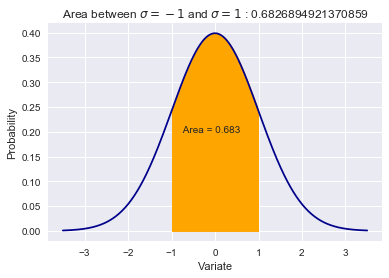

In [ ]:
# Fill in the area between -1 and 1
mean = 0.0 ; std = 1.0
x = np.linspace(-3.5*std, 3.5*std, 500)
y = stats.norm.pdf(x, loc=mean, scale=std)
plt.plot(x,y, color="darkblue")
low=-1.0 ; high=1.0
px = x[np.logical_and(x >= low, x <= high)]
plt.fill_between(px, stats.norm.pdf(px,mean,std), color='orange', alpha=1.0, linewidth=1)
plt.xlabel("Variate")
plt.ylabel("Probability")
plt.title("Area between $\sigma=-1$ and $\sigma=1$ : {0}".format(area1))
plt.text(-0.8,0.2, ' Area = %5.3f' % (area1))
plt.show()

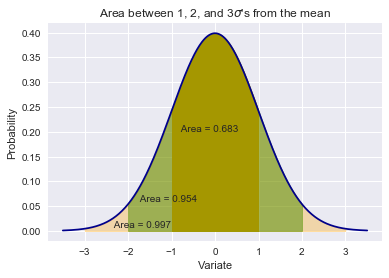

In [ ]:
# Fill in the areas designated by area1, area2, and area3
mean = 0.0 ; std = 1.0
x = np.linspace(-3.5*std, 3.5*std, 500)
y = stats.norm.pdf(x, loc=mean, scale=std)
plt.plot(x,y, color="darkblue")
low=-1.0 ; high=1.0
px = x[np.logical_and(x >= low, x <= high)]
plt.fill_between(px, stats.norm.pdf(px,mean,std), color='orange', alpha=1.0, linewidth=1)
plt.xlabel("Variate")
plt.ylabel("Probability")
plt.title("Area between 1, 2, and 3$\sigma$\'s from the mean")
plt.text(-0.85,0.2, ' Area = %5.3f' % (area1))

low=-2.0 ; high=2.0
px = x[np.logical_and(x >= low, x <= high)]
plt.fill_between(px, stats.norm.pdf(px,mean,std), color='green', alpha=0.5, linewidth=1)
plt.text(-1.8,0.06, ' Area = %5.3f' % (area2))

low=-3.0 ; high=3.0
px = x[np.logical_and(x >= low, x <= high)]
plt.fill_between(px, stats.norm.pdf(px,mean,std), color='orange', alpha=0.3, linewidth=1)
plt.text(-2.4,0.007, ' Area = %5.3f' % (area3))

plt.show()

We'll re-visit the **PPF** function below and look into its details. Nevertheless, we'll use it now to check the boundaries of the areas we computed above.

#### What are the boundaries for 68.2689% of the total area centered around the mean?

In [ ]:
alpha = 1 - 0.6826894
stats.norm.ppf([alpha/2, 1-alpha/2])

array([-0.99999981,  0.99999981])

[-1,1] was the solution we expected.<br>
What about the interval that contains 95% of the data?

In [ ]:
alpha = 1 - 0.9544997
stats.norm.ppf([alpha/2, 1-alpha/2])

array([-1.99999967,  1.99999967])

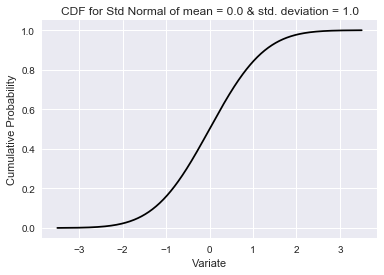

In [ ]:
mean = 0.0 ; std = 1.0
x = np.linspace(-3.5*std, 3.5*std, 500)
y = stats.norm.cdf(x, loc=mean, scale=std)
plt.plot(x,y, color="black")
plt.xlabel("Variate")
plt.ylabel("Cumulative Probability")
plt.title("CDF for Std Normal of mean = {0} & std. deviation = {1}".format(mean, std))
plt.show()

CDF, as expected, sums up to 1 as x goes from $-\infty$ to $+\infty$<br>
At half-point ($x=0$), CDF must be 1/2 as can be seen from the computation below:

In [ ]:
print('CDF at X=0:', stats.norm.cdf(0.0, loc=0.0, scale=1.0) )

CDF at X=0: 0.5


### Use of Percent Point Function (PPF) or Inverse Cumulative Function
PPF is the inverse of the CDF. That is, PPF gives the value of the variate for which the cumulative probability has the given value. Here is an example:

We want to find out the value of the variate (X) such that the probability of having a value less than X is 0.4 for a standard normal distribution.<br>
$$P(X \leq x_0) = \int_0^{x_0} f(X)dX = 0.4$$ What is the value of $x_0$ that satisfies this condition?<br>

In [ ]:
x0 = stats.norm.ppf(0.4, loc=0.0, scale=1.0)
print('Value of variate:', x0)

Value of variate: -0.2533471031357997


<b>Cross-check</b>: Find the area under the normal curve between $-\infty$ and $(x_0=-0.253347)$ :

In [ ]:
# Get x0 back
stats.norm.cdf(-0.253347, loc=0.0, scale=1.0)

0.4000000398457467

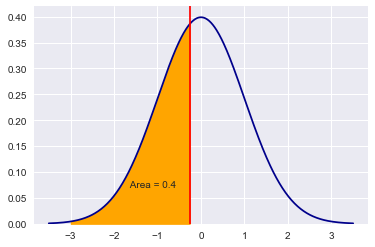

In [ ]:
y = stats.norm.pdf(x, loc=mean, scale=std)
plt.plot(x,y, color="darkblue")
low=-3.0 ; high=x0
px = x[np.logical_and(x >= low, x <= high)]
plt.axvline(x=x0, color='r', linestyle='-')
plt.fill_between(px, stats.norm.pdf(px,mean,std), color='orange', alpha=1.0, linewidth=1)
plt.text(-1.7,0.07, ' Area = %3.1f' % (0.4))
plt.ylim(0.,0.42)
plt.show()

### Drawing a sample from a distribution
In the part below:
1. We'll create a normal distribution and sample from it.
2. We'll create a histogram based on the sample drawn. 
3. We'll then fit a probability distribution to the sampled data.
4. We'll finally plot the fitted and theoretical distributions together on top of the histogram to see how well thay match. 

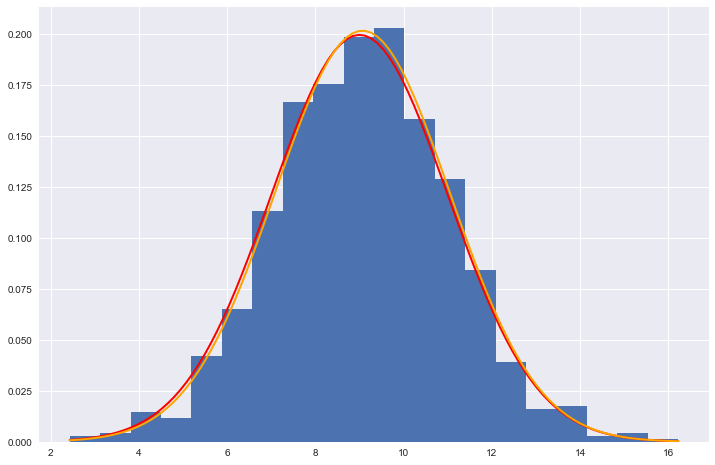

Mean and variance of the sample:  9.066554055785712 1.9797776568444865


In [ ]:
seed = 5                              # For reproducibility
dist = stats.norm(9,2)                # Create a normal dist with mean=9 and std dev=2
y = dist.rvs(1000, random_state=seed) # Draw 1000 samples from N(9,2)
#
plt.figure(figsize=(12,8))            # Plot the histogramn
plt.hist(y, bins=20, density=True)    # with relative frequencies
#
x = np.linspace(y.min(), y.max(), 100)
h = stats.norm.pdf(x, loc=9, scale=2) # Theoretical pdf computed with 
plt.plot(x,h, color='red', lw=2)      # the given mean=0 and std-dev=2
#
mu, sigma = stats.norm.fit(y)         # Fit a normal dist to find mu and sigma
plt.plot(x, stats.norm(mu, sigma).pdf(x), color='orange', lw=2)
#
#sns.kdeplot(y, color='black')         # kernel density estimation (KDE) from seaborn library
plt.show()
print('Mean and variance of the sample: ', y.mean(), y.std()) # See how they differ from "9" and "2"

We can use a quantile-quantile plot to check visually how well the fitted distribution fits the data. It’s particularly important to check how it fits at the edges of the qqplot (in the tails of the distribution). 

KstestResult(statistic=0.99748211150441, pvalue=0.0)


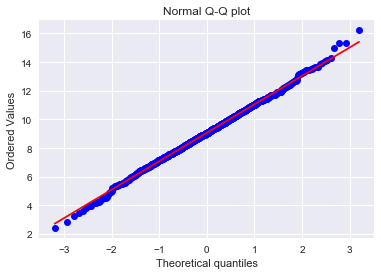

In [ ]:
stats.probplot(y, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");
# also run a Kolmogorov-Smirnov test to measure goodness of fit
print(stats.kstest(y, "norm"))

A perfect fit indeed!

#### Drawing a sample of size=1000 from a normal distribution with mean=9 and std dev=2:
This is also a valid format:
<pre>stats.norm.rvs(loc=9, scale=2, size=1000, random_state=5)</pre>